In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Task 12
            - Rana is an mid-aged female with PHD education who has been employeed in a company for a long time came unemployeed recently 
              because of two reasons: payment wasn't good accourding her experience, and the company didn't place her in the right office 
              accrouding to her knownledges all over this years.
             
              so, she is now looking forward to apply in this company but, she needs to know some information to 
              guarantee her stay in the company:
                - she looking for a friends employees from her age to communicate
                - Are they accepting any education and will it increase her salary
                - if she works here for a long time how can she guarantee that she won't be leaving like what 
                  happean in the last company

              
              


In [3]:
data = pd.read_csv("Employee.csv")
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
data.shape

(4653, 9)

Checking for null values

In [5]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## Q1  How diverse are the Education levels of employees?

In [6]:
data.Education.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

## A1:
        Bachelors, Masters, PHD

## Q2 Is the age related to experience?

In [7]:
aqe= data[(data['ExperienceInCurrentDomain']==7)]
aqe

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3960,Bachelors,2016,Bangalore,3,39,Male,No,7,0
3962,Bachelors,2016,Pune,3,38,Female,No,7,0
3971,Masters,2014,Bangalore,3,40,Female,No,7,1
3975,Bachelors,2014,Bangalore,3,39,Male,No,7,1
3978,Bachelors,2012,Bangalore,3,38,Male,No,7,1
3982,Bachelors,2012,Bangalore,1,35,Male,No,7,0
3985,Bachelors,2015,Pune,3,34,Male,Yes,7,0
3988,Bachelors,2016,Bangalore,3,38,Female,No,7,0
3989,Bachelors,2015,Pune,2,41,Female,No,7,0


<AxesSubplot:xlabel='Age', ylabel='ExperienceInCurrentDomain'>

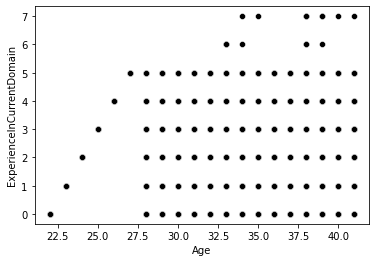

In [8]:
sns.scatterplot(data=data, x="Age", y="ExperienceInCurrentDomain",color="black")

## A2 
        yes, age is related
        As getting old as the experience raises 

## Q3 How does the company fare at Gender Diversity ?

In [9]:
data['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

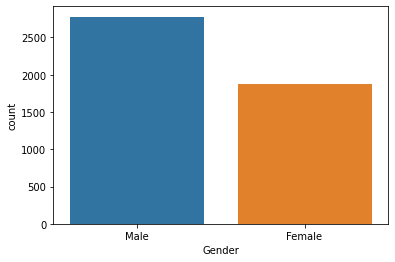

In [10]:
sns.countplot(data=data, x='Gender')

## A3: 
        Well, males are preferred in this job as no. of males is bigger

## Q4 which city has the most employees and which has most leavers?

<AxesSubplot:xlabel='City', ylabel='count'>

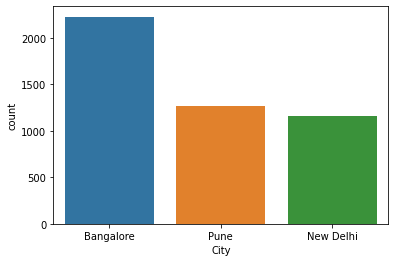

In [11]:
sns.countplot(data=data, x='City')

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

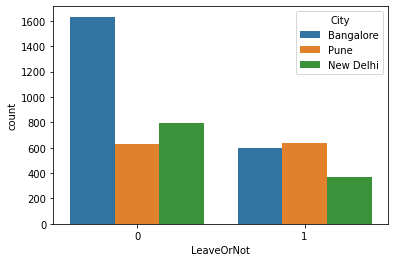

In [12]:
sns.countplot(data=data, x='LeaveOrNot', hue='City')

## A4: 
        Bangalore contains the larges counts of the employess and the non-leavers too!
        while Pune has the most leavers.
    

## Q5 What is the most common age between employees?

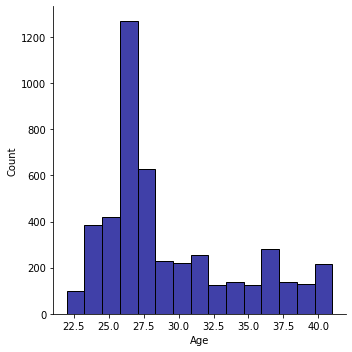

In [29]:
sns.displot(data['Age'].dropna(), kde=False, color='darkblue',bins =15)

## A5:
        Most common age with employees is 27

## Q6 Does Employee's Education affect Payment Tiers?

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

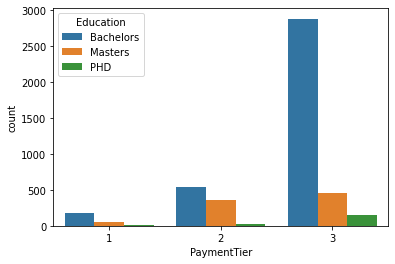

In [14]:
sns.countplot(data=data, x="PaymentTier", hue="Education")

## A6:
        Yes, looking at the graph all the PHD employees can't have less than the best payment, number of masters employees begins in the 2nd payment and increases in the 3rd, Bachelors employees in the 3 payments according to their efficiency
 

## Q7: Does Gender across Payment Tiers affect an Employee's decision whether he/she leaves the company or not?

In [15]:
l = data[(data['PaymentTier']== 3)& (data['LeaveOrNot']== 1) ]
l.groupby('Gender').count()

,Education,JoiningYear,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Gender,,,,,,,,
Female,390,390,390,390,390,390,390,390
Male,571,571,571,571,571,571,571,571


In [16]:
l = data[(data['PaymentTier']== 2)& (data['LeaveOrNot']== 1) ]
l.groupby('Gender').count()

,Education,JoiningYear,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Gender,,,,,,,,
Female,425,425,425,425,425,425,425,425
Male,125,125,125,125,125,125,125,125


In [17]:
l = data[(data['PaymentTier']== 1)& (data['LeaveOrNot']== 1) ]
l.groupby('Gender').count()

,Education,JoiningYear,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Gender,,,,,,,,
Female,69,69,69,69,69,69,69,69
Male,20,20,20,20,20,20,20,20


<AxesSubplot:xlabel='PaymentTier', ylabel='LeaveOrNot'>

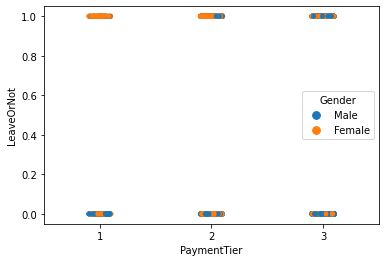

In [18]:
from turtle import color


sns.stripplot(data=data, x="PaymentTier", y="LeaveOrNot", hue="Gender")


## A7:
        Yes, it affects.
        - On the below payment, Male seems that he don't have a chioce to leave as if he could bs starting his career and on the other hand 
          female can normally leaves 
        - on the 2nd payment,  mostly the male seems to leaves and the females stay as the payment could suitable for most of them
        -  On the best payment seems it returns balance with the genders. 


## Q8 How is the Employee strength spread over office locations?

In [19]:
x= data.groupby(['City','ExperienceInCurrentDomain']).count()
x

Education  JoiningYear  PaymentTier  Age  \
City      ExperienceInCurrentDomain                                             
Bangalore 0                                177          177          177  177   
          1                                292          292          292  292   
          2                                452          452          452  452   
          3                                391          391          391  391   
          4                                451          451          451  451   
          5                                453          453          453  453   
          6                                  6            6            6    6   
          7                                  6            6            6    6   
New Delhi 0                                 74           74           74   74   
          1                                119          119          119  119   
          2                                331          331          331  331   
          3                                193          193          193  193   
          4                                223          223          223  223   
          5                                216          216          216  216   
          6                                  1            1            1    1   
Pune      0                                104          104          104  104   
          1                                147          147          147  147   
          2                                304          304          304  304   
          3                                202          202          202  202   
          4                                257          257          257  257   
          5                                250          250          250  250   
          6                                  1            1            1    1   
          7                                  3            3            3    3   

                                     Gender  EverBenched  LeaveOrNot  
City      ExperienceInCurrentDomain                                   
Bangalore 0                             177          177         177  
          1                             292          292         292  
          2                             452          452         452  
          3                             391          391         391  
          4                             451          451         451  
          5                             453          453         453  
          6                               6            6           6  
          7                               6            6           6  
New Delhi 0                              74           74          74  
          1                             119          119         119  
          2                             331          331         331  
          3                             193          193         193  
          4                             223          223         223  
          5                             216          216         216  
          6                               1            1           1  
Pune      0                             104          104         104  
          1                             147          147         147  
          2                             304          304         304  
          3                             202          202         202  
          4                             257          257         257  
          5                             250          250         250  
          6                               1            1           1  
          7                               3            3           3

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

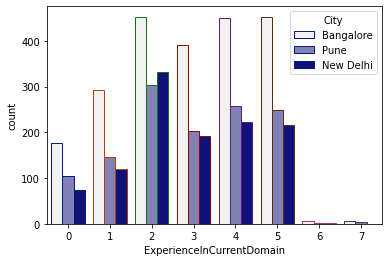

In [20]:
sns.countplot(data=data ,x='ExperienceInCurrentDomain', hue='City',color="darkblue",edgecolor=sns.color_palette("dark"))

## A8
        Employees spread over locations accourding thier experience
        (Bangalore outperform all)
       
        - As we begin with the most experience employees (7) they mainly concentered in Bangalore as it contains the larges no.of employees 
        as well, then pune comes as second option as it contain also no. of employees with 7th experience.

        - Then the Bangalore also has most of the 6th experience employees, then Pune is comes after it as second option and a weak 
        appearance of new delhi with them.

        - 5th experience emps. spreads in Bangalore,then pune and new delhi come last.
        
        - and so on as on the plot.


## Q9 Does a company no longer appreciate the old employees? 

In [30]:
s= data[(data['JoiningYear']==2012) ]
s.groupby(['LeaveOrNot']).count()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
LeaveOrNot,,,,,,,,
0,395,395,395,395,395,395,395,395
1,109,109,109,109,109,109,109,109


## A9
        1- no. of non-leavers exceeds no. of leavers

In [31]:
s.groupby(['PaymentTier']).count()

,Education,JoiningYear,City,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
PaymentTier,,,,,,,,
1,28,28,28,28,28,28,28,28
2,29,29,29,29,29,29,29,29
3,447,447,447,447,447,447,447,447


<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

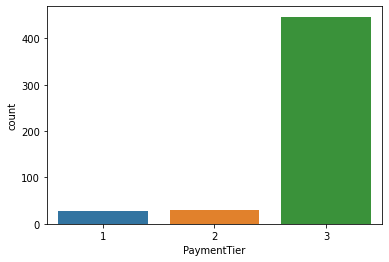

In [32]:
sns.countplot(data=s, x='PaymentTier')

## A9
        2- we can conside that most of these employees get the best (3rd) payment

<AxesSubplot:>

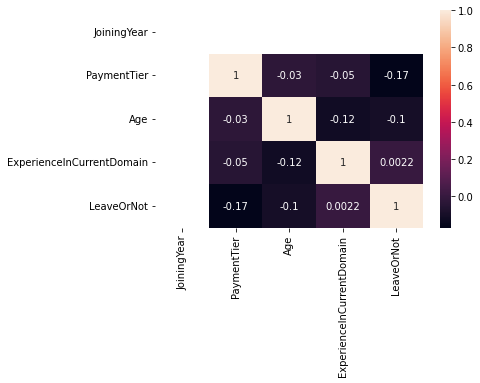

In [33]:
sns.heatmap(s.corr(),annot = True)

## Q10 Does improving the education affects experience?

In [34]:
v = data[(data['Education']=='PHD') & (data['ExperienceInCurrentDomain']==7)] 
v.count()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [35]:
m = data[(data['Education']=='Masters') & (data['ExperienceInCurrentDomain']==7)] 
m.count()

Education                    1
JoiningYear                  1
City                         1
PaymentTier                  1
Age                          1
Gender                       1
EverBenched                  1
ExperienceInCurrentDomain    1
LeaveOrNot                   1
dtype: int64

In [36]:
m = data[(data['Education']=='Bachelors') & (data['ExperienceInCurrentDomain']==7)] 
m.count()

Education                    8
JoiningYear                  8
City                         8
PaymentTier                  8
Age                          8
Gender                       8
EverBenched                  8
ExperienceInCurrentDomain    8
LeaveOrNot                   8
dtype: int64

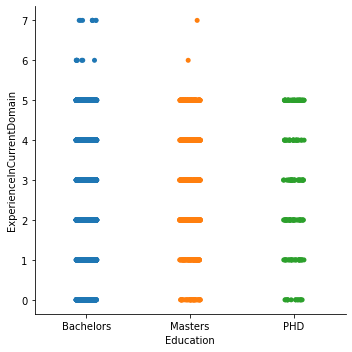

In [37]:
sns.catplot(x="Education", y="ExperienceInCurrentDomain", data=data)

## A10
        No it doesn't
        Education & Experience aren't related in the first place as we can see noone with the phd education has the best (7th) experience and 
        the no of bachelor employees with the best experience exceeds the no. of masters employees